In [1]:
# 导入数据
import pandas as pd

data = pd.read_csv('car.data', header=None, 
                    names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
data.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [6]:
# 数据预处理
from sklearn.preprocessing import LabelEncoder
def convert(col, value_name_list):
    le = LabelEncoder()
    result = le.fit_transform(col)
    value_name_list.append(le.classes_)
    return result

import numpy as np
name_list = []
dataset = np.apply_along_axis(convert, axis=0, arr=data, value_name_list=name_list)
name_list

[array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['big', 'med', 'small'], dtype=object),
 array(['high', 'low', 'med'], dtype=object),
 array(['acc', 'good', 'unacc', 'vgood'], dtype=object)]

In [29]:
# 模型创建、训练、评估
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[:, :-1], dataset[:, -1], random_state=0)

clf=DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print("训练集上的准确率：{:.3f}".format(clf.score(X_train,y_train)))
print("测试集上的准确率：{:.3f}".format(clf.score(X_test,y_test)))

训练集上的准确率：1.000
测试集上的准确率：0.977


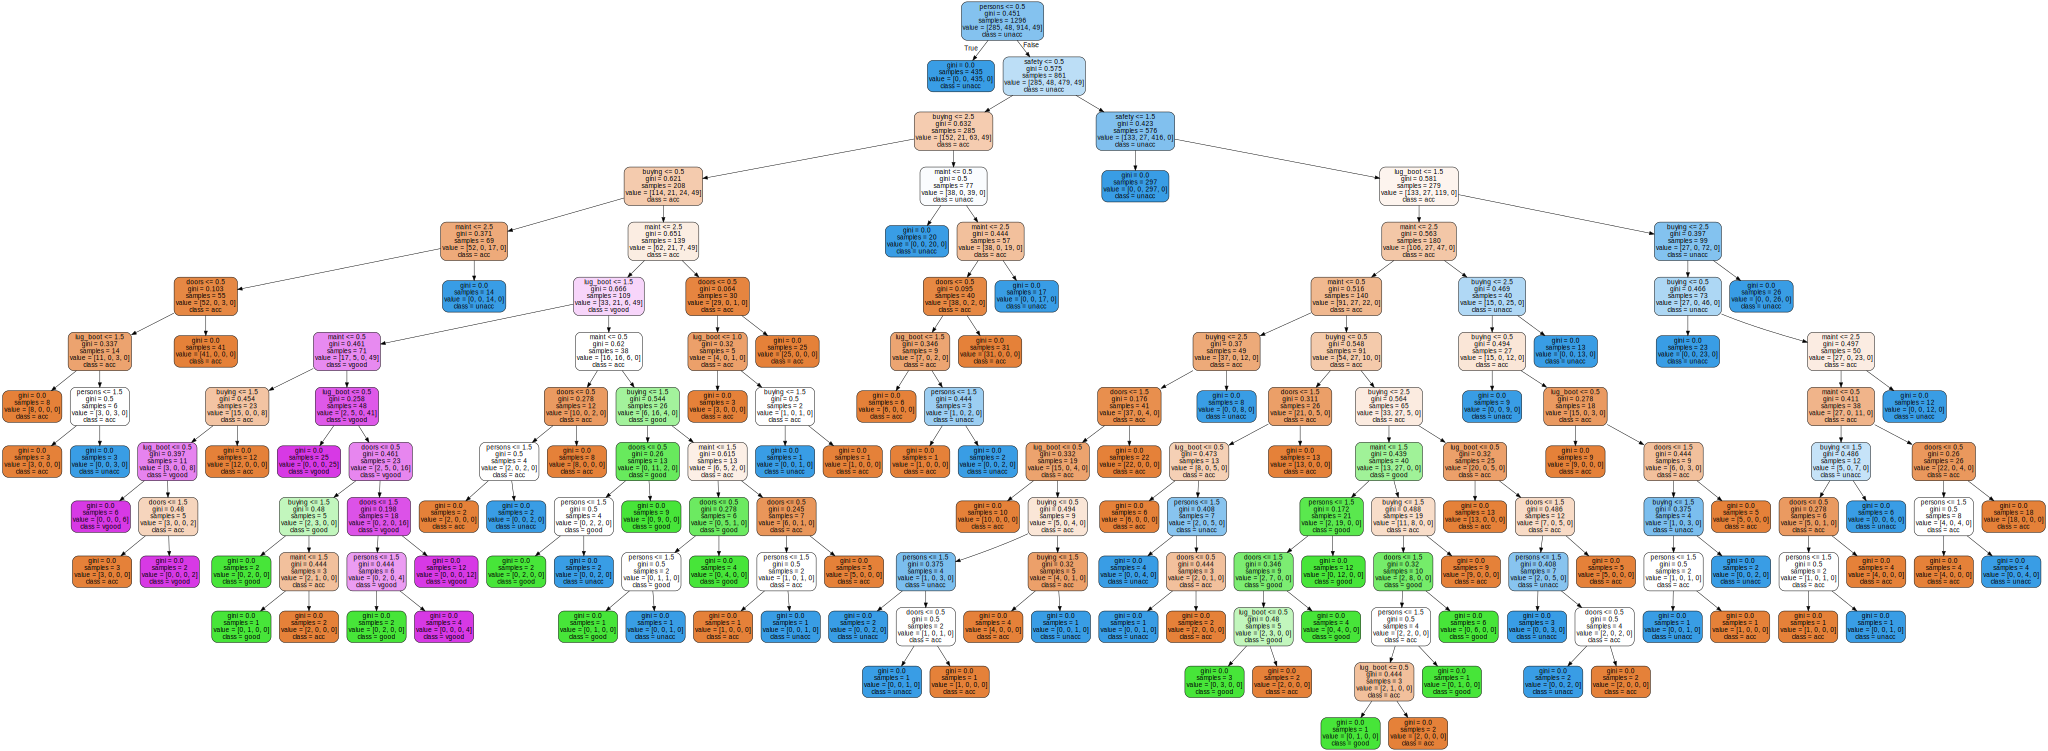

In [22]:
# 画出决策树
from sklearn.tree import export_graphviz
dot_data = export_graphviz(clf, out_file=None, class_names=['acc', 'good', 'unacc', 'vgood'], 
            feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], filled=True, rounded=True)
import graphviz
graphviz.Source(dot_data)

In [28]:
# 剪枝处理，寻找最优决策树
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
params = {'max_depth': np.arange(4, 16)}
tree = GridSearchCV(DecisionTreeClassifier(), params)
tree.fit(X_train, y_train)
print(f"最优超参数组合: {tree.best_params_}")

tree = DecisionTreeClassifier(max_depth=12)
tree.fit(X_train, y_train)
labels = tree.predict(X_test)
print('模型评估报告：\n', classification_report(y_test, labels))

最优超参数组合: {'max_depth': 15}
训练集上的准确率：1.000
测试集上的准确率：0.977
模型评估报告：
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        99
           1       0.88      1.00      0.93        21
           2       0.99      1.00      0.99       296
           3       1.00      0.94      0.97        16

    accuracy                           0.98       432
   macro avg       0.96      0.97      0.97       432
weighted avg       0.98      0.98      0.98       432



Feature importances:
[0.17945146 0.21256599 0.05576019 0.19599705 0.09507492 0.26115038]


Text(0, 0.5, 'Feature')

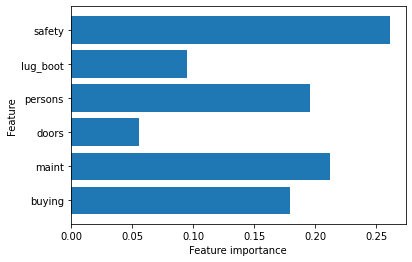

In [30]:
# 查看树的特征重要性
print("Feature importances:\n{}".format(tree.feature_importances_))

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n_features = 6
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
plt.xlabel("Feature importance")
plt.ylabel("Feature")